![](https://i.imgur.com/JsMvGnP.png)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
sns.set()

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima de 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

### 3.1 Análise exploratória

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df["Exited"].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

### 3.2 Preparação e limpeza dos dados

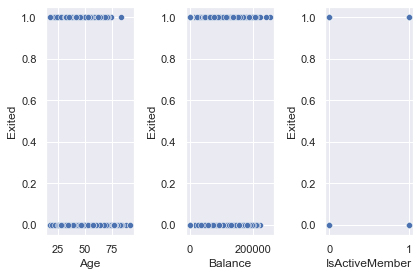

In [7]:
fig=plt.figure()
fig.add_subplot(1,3,1)
sns.scatterplot(data=df, x='Age', y='Exited')
fig.add_subplot(1,3,2)
sns.scatterplot(data=df, x='Balance', y='Exited')
fig.add_subplot(1,3,3)
sns.scatterplot(data=df, x='IsActiveMember', y='Exited')
plt.tight_layout()

<AxesSubplot:>

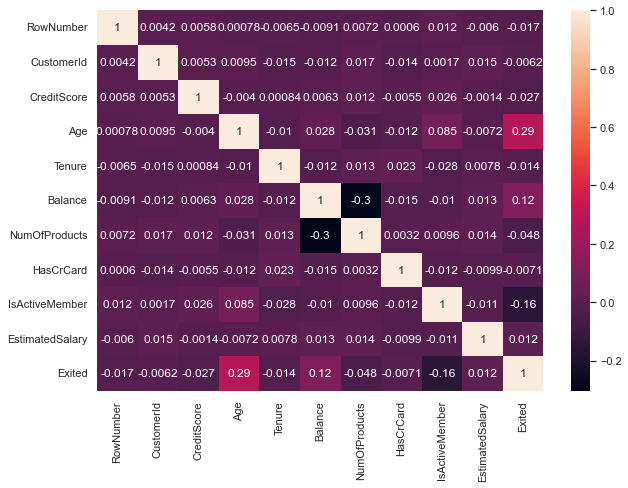

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

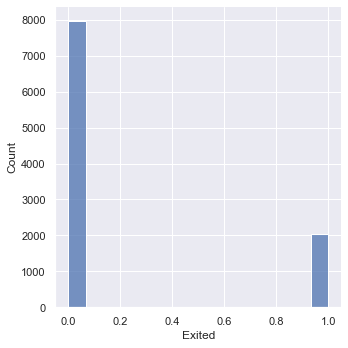

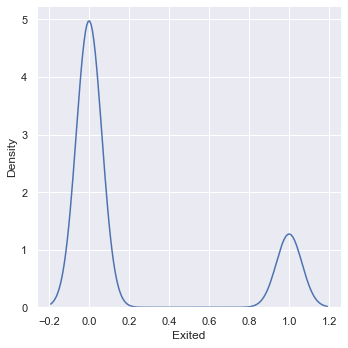

In [9]:
sns.displot(data=df,x="Exited",kind="hist")
sns.displot(data=df,x="Exited",kind="kde")

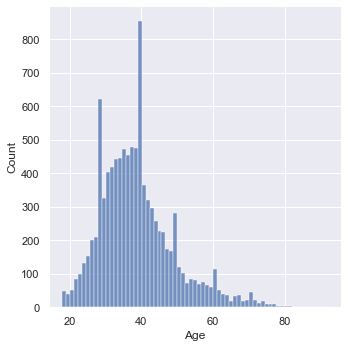

In [10]:
sns.displot(data=df,x="Age",kind="hist")

In [11]:
def remover_outliers(tabela,coluna):
    q1 = tabela.loc[:,coluna].quantile(.25)
    q3 = tabela.loc[:,coluna].quantile(.75)
    
    iqr = q3-q1
    
    lb = max(q1 - 1.5*iqr,0) 
    ub = q3 + 1.5*iqr
    
    print(f"Lower bound: {lb}, upper bound: {ub}")
    
    len_before = sum(~tabela.loc[:,coluna].isnull()) #somando tudo que não eh vazio na coluna selecionada
    tabela.loc[[coluna] & (~tabela[coluna].between(lb,ub))] = np.nan
    len_after = sum(~tabela.loc[:,coluna].isnull())
    
    print (f"Removidos {(1 -(len_after/len_before))*100}% dos dados")
    return tabela

In [12]:
df_Age = remover_outliers(df, "Age") #removendo outliers de Preço

Lower bound: 14.0, upper bound: 62.0
Removidos 3.5900000000000043% dos dados


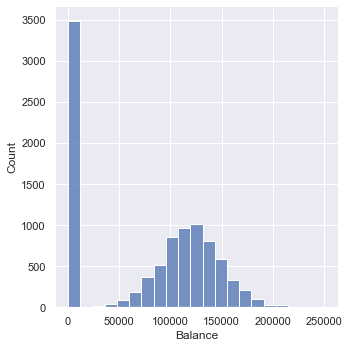

In [13]:
sns.displot(data=df,x="Balance",kind="hist")

In [14]:
df_Age.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


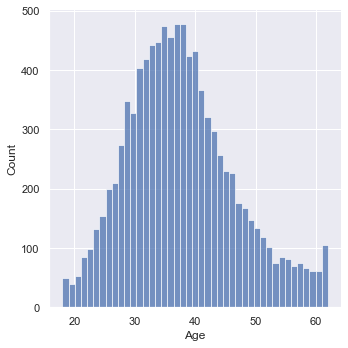

In [15]:
sns.displot(data=df_Age,x="Age",kind="hist")

In [16]:
df.isnull().sum()

RowNumber          359
CustomerId         359
Surname            359
CreditScore        359
Geography          359
Gender             359
Age                359
Tenure             359
Balance            359
NumOfProducts      359
HasCrCard          359
IsActiveMember     359
EstimatedSalary    359
Exited             359
dtype: int64

### 3.3 Seleção de atributos

In [17]:
df = df_Age

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9641 non-null   float64
 1   CustomerId       9641 non-null   float64
 2   Surname          9641 non-null   object 
 3   CreditScore      9641 non-null   float64
 4   Geography        9641 non-null   object 
 5   Gender           9641 non-null   object 
 6   Age              9641 non-null   float64
 7   Tenure           9641 non-null   float64
 8   Balance          9641 non-null   float64
 9   NumOfProducts    9641 non-null   float64
 10  HasCrCard        9641 non-null   float64
 11  IsActiveMember   9641 non-null   float64
 12  EstimatedSalary  9641 non-null   float64
 13  Exited           9641 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [19]:
df.duplicated(subset=['RowNumber', 'CustomerId', 'Surname',
       'CreditScore','Geography','Gender','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [20]:
df = df.drop_duplicates(subset=['RowNumber', 'CustomerId', 'Surname',
       'CreditScore','Geography','Gender','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9641 non-null   float64
 1   CustomerId       9641 non-null   float64
 2   Surname          9641 non-null   object 
 3   CreditScore      9641 non-null   float64
 4   Geography        9641 non-null   object 
 5   Gender           9641 non-null   object 
 6   Age              9641 non-null   float64
 7   Tenure           9641 non-null   float64
 8   Balance          9641 non-null   float64
 9   NumOfProducts    9641 non-null   float64
 10  HasCrCard        9641 non-null   float64
 11  IsActiveMember   9641 non-null   float64
 12  EstimatedSalary  9641 non-null   float64
 13  Exited           9641 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [22]:
df = df.dropna(how='all')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9641 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9641 non-null   float64
 1   CustomerId       9641 non-null   float64
 2   Surname          9641 non-null   object 
 3   CreditScore      9641 non-null   float64
 4   Geography        9641 non-null   object 
 5   Gender           9641 non-null   object 
 6   Age              9641 non-null   float64
 7   Tenure           9641 non-null   float64
 8   Balance          9641 non-null   float64
 9   NumOfProducts    9641 non-null   float64
 10  HasCrCard        9641 non-null   float64
 11  IsActiveMember   9641 non-null   float64
 12  EstimatedSalary  9641 non-null   float64
 13  Exited           9641 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


### 3.4 Construção do modelo

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [51]:
features = ["Age", "Balance", "EstimatedSalary"]
#feature2 = df.loc[:,df.columns!=("Exited","IsActiveMember","HasCrCard")]
features_bool=["IsActiveMember","HasCrCard"]
target = "Exited"

In [59]:
#feafeature2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
X = df[features]
y = df[target]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=7775)

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = pd.DataFrame(scaler.transform(X_train[features]),columns=features)
X_scaled_test = pd.DataFrame(scaler.transform(X_test[features]),columns = features)

In [29]:
rfc = RandomForestClassifier()
rfc.fit (X_scaled_train, y_train)
result_rfc = rfc.predict(X_scaled_test)
result_rfc

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
import random

In [31]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='stratified', random_state=random.seed())
dc.fit(X_scaled_train, y_train)
result_dc = dc.predict(X_scaled_test)
result_dc

array([0., 0., 0., ..., 0., 1., 0.])

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()
svc.fit(X_scaled_train, y_train)
result_svc = svc.predict(X_scaled_test)
result_svc

array([0., 0., 0., ..., 0., 0., 0.])

### 3.5 Avaliação do modelo

In [34]:
from sklearn.metrics import r2_score

In [35]:
dc.score(X_test, result_dc)

0.6765163297045101

In [36]:
svc.score(X_test, result_svc)

0.9170554691550026

In [37]:
rfc.score(X_test, result_rfc)

0.8465526179367548

### Melhor Modelo é utilizando o SVC

### 3.4 Otimização do modelo

In [38]:
from sklearn.feature_selection import RFE

In [41]:
lr = LogisticRegression()

In [42]:
rfe = RFE(estimator=lr, n_features_to_select=1, step =1)
rfe.fit(X_scaled_train,y_train)
ranking = rfe.ranking_

In [44]:
pd.DataFrame(zip(X.columns, ranking),columns=["feature","order"]).sort_values("order",ascending = True)

,feature,order
0,Age,1
1,Balance,2
2,EstimatedSalary,3


### Como já havíamos observado, a variável mais importante em termos de correlação é a "Age"

In [65]:
X = df[ features + features_bool]
y = df[target]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=7775)

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = pd.DataFrame(scaler.transform(X_train[features+features_bool]),columns=features+features_bool)
X_scaled_test = pd.DataFrame(scaler.transform(X_test[features+features_bool]),columns = features+features_bool)

In [69]:
rfc = RandomForestClassifier()
rfc.fit (X_scaled_train, y_train)
result_rfc = rfc.predict(X_scaled_test)
result_rfc

array([1., 0., 0., ..., 0., 0., 0.])

In [70]:
dc = DummyClassifier(strategy='stratified', random_state=random.seed())
dc.fit(X_scaled_train, y_train)
result_dc = dc.predict(X_scaled_test)
result_dc

array([1., 0., 0., ..., 0., 0., 0.])

In [71]:
svc = SVC()
svc.fit(X_scaled_train, y_train)
result_svc = svc.predict(X_scaled_test)
result_svc

array([1., 0., 0., ..., 0., 0., 0.])

In [72]:
dc.score(X_test, result_dc)

0.6661482633488854

In [73]:
svc.score(X_test, result_svc)

0.9403836184551582

In [74]:
rfc.score(X_test, result_rfc)

0.5811301192327631

### Adicionando as colunas boleanas "IsActiveMember", "HasCrCard" aos índices "Age", "Balance", "EstimatedSalary", o modelo SVC acabou tendo resultados mais satisfatórios do que sem essa coluna.

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.